<a href="https://colab.research.google.com/github/ArpitaMallik/SpaceshipTitanic_Prediction_Model_Kaggle/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/train_space.csv")
df.head()
df_test = pd.read_csv("/content/drive/MyDrive/Dataset/test_space.csv")

In [ ]:
print(df["HomePlanet"].value_counts())
print(df["Destination"].value_counts())


Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Handling Missing Values

In [ ]:
mode_value = df['CryoSleep'].mode()[0]
df['CryoSleep'].fillna(mode_value, inplace=True)

mode_value = df_test['CryoSleep'].mode()[0]
df_test['CryoSleep'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = df['HomePlanet'].mode()[0]
df['HomePlanet'].fillna(mode_value, inplace=True)

mode_value = df_test['HomePlanet'].mode()[0]
df_test['HomePlanet'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = df['Destination'].mode()[0]
df['Destination'].fillna(mode_value, inplace=True)

mode_value = df_test['Destination'].mode()[0]
df_test['Destination'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_value, inplace=True)

mode_value = df_test['Cabin'].mode()[0]
df_test['Cabin'].fillna(mode_value, inplace=True)

In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)

In [ ]:
mode_value = df['VIP'].mode()[0]
df['VIP'].fillna(mode_value, inplace=True)

mode_value = df_test['VIP'].mode()[0]
df_test['VIP'].fillna(mode_value, inplace=True)

In [ ]:
df["RoomService"].fillna(df["RoomService"].mean(), inplace=True)

df_test["RoomService"].fillna(df_test["RoomService"].mean(), inplace=True)

In [ ]:
df["FoodCourt"].fillna(df["FoodCourt"].mean(), inplace=True)

df_test["FoodCourt"].fillna(df_test["FoodCourt"].mean(), inplace=True)

In [ ]:
df["ShoppingMall"].fillna(df["ShoppingMall"].mean(), inplace=True)

df_test["ShoppingMall"].fillna(df_test["ShoppingMall"].mean(), inplace=True)

In [ ]:
df["Spa"].fillna(df["Spa"].mean(), inplace=True)

df_test["Spa"].fillna(df_test["Spa"].mean(), inplace=True)

In [ ]:
df["VRDeck"].fillna(df["VRDeck"].mean(), inplace=True)

df_test["VRDeck"].fillna(df_test["VRDeck"].mean(), inplace=True)

In [ ]:
df_test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

<ipython-input-464-6ab3a4ed6d57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

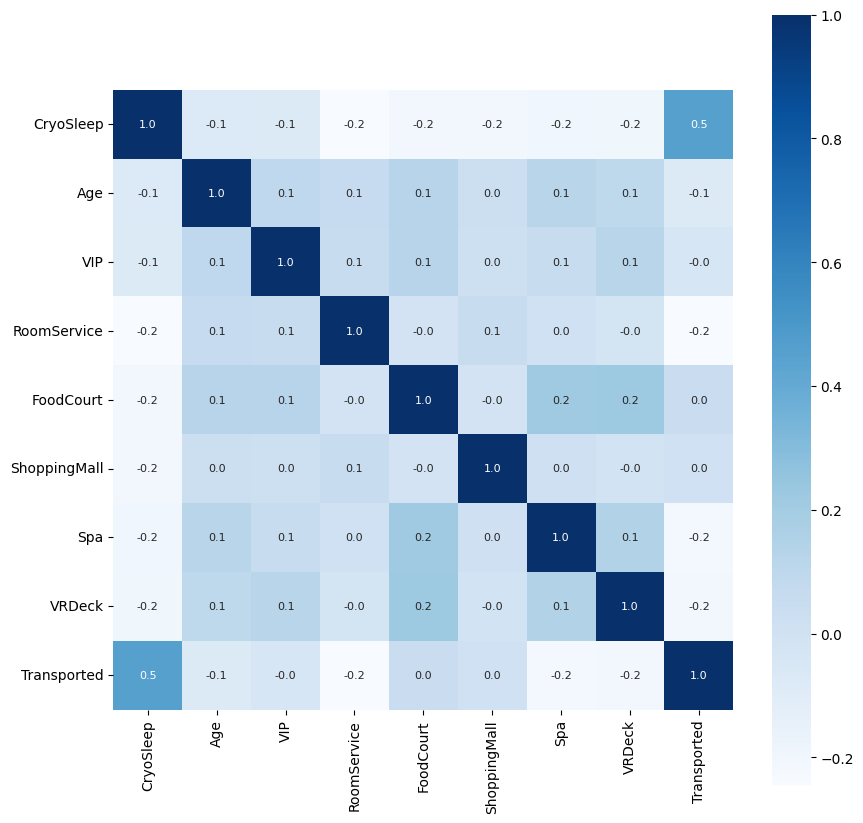

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size":8}, cmap="Blues")

Encoding

In [ ]:
df.replace({"CryoSleep":{True: 1, False: 0},
             "VIP": {True:1, False:0},
            "HomePlanet": {"Earth":0, "Mars":1, "Europa":2},
            "Destination": {"TRAPPIST-1e":0, "55 Cancri e":1, "PSO J318.5-22":2},
             "Transported": {True:1, False:0}}, inplace=True)

#for test data
df_test.replace({"CryoSleep":{True: 1, False: 0},
             "VIP": {True:1, False:0},
            "HomePlanet": {"Earth":0, "Mars":1, "Europa":2},
            "Destination": {"TRAPPIST-1e":0, "55 Cancri e":1, "PSO J318.5-22":2},
             "Transported": {True:1, False:0}}, inplace=True)

<Axes: xlabel='VIP', ylabel='Transported'>

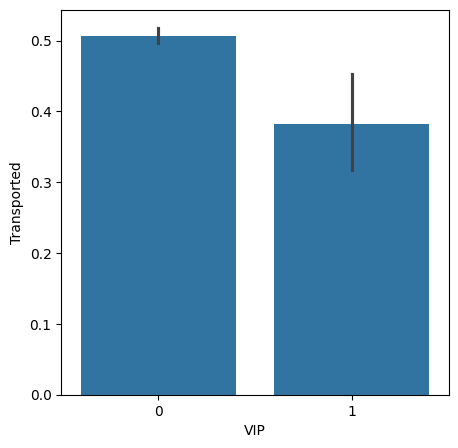

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="VIP", y="Transported", data=df)

<Axes: xlabel='Age', ylabel='Transported'>

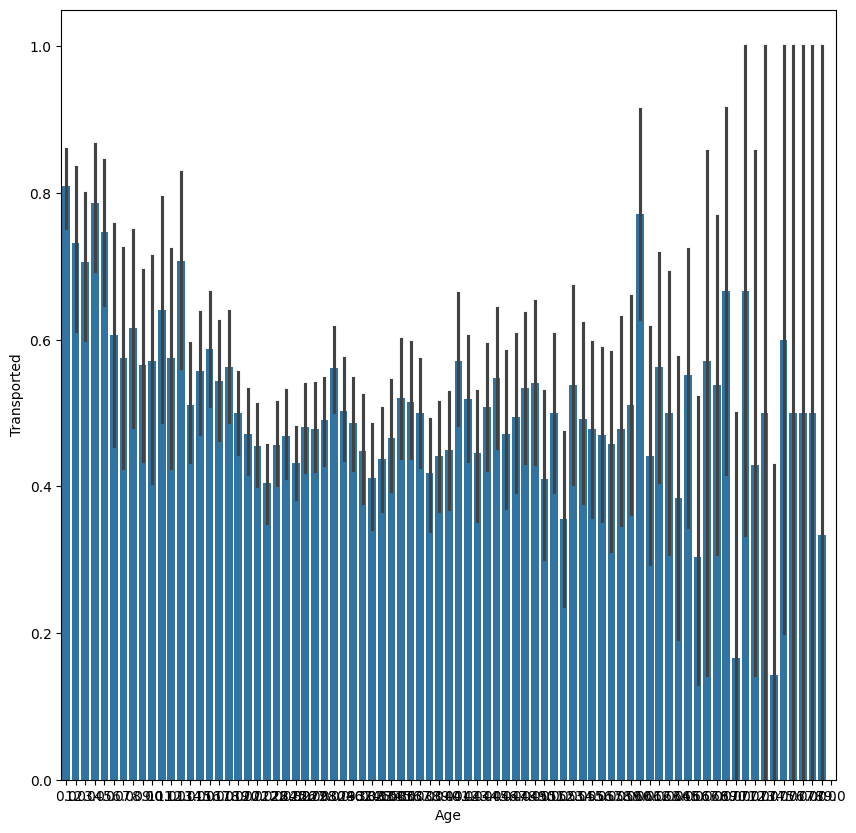

In [ ]:
plot = plt.figure(figsize=(10,10))
sns.barplot(x="Age", y="Transported", data=df)

<Axes: xlabel='CryoSleep', ylabel='Transported'>

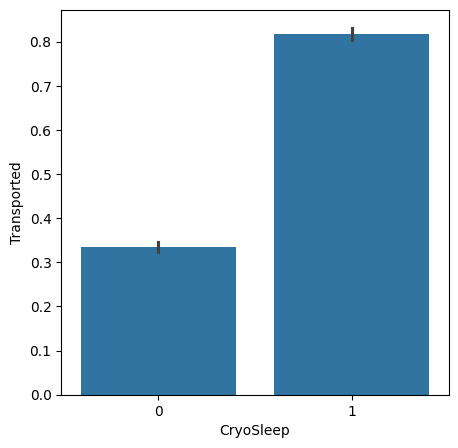

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="CryoSleep", y="Transported", data=df)

<Axes: xlabel='HomePlanet', ylabel='Transported'>

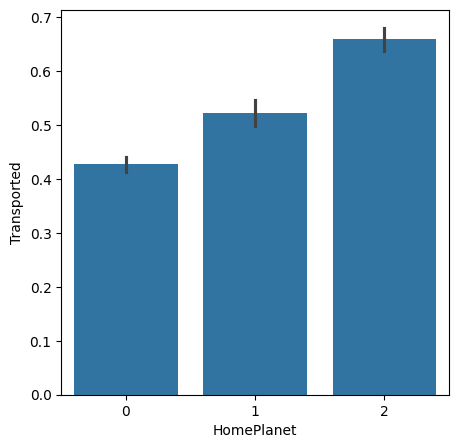

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="HomePlanet", y="Transported", data=df)

<Axes: xlabel='Destination', ylabel='Transported'>

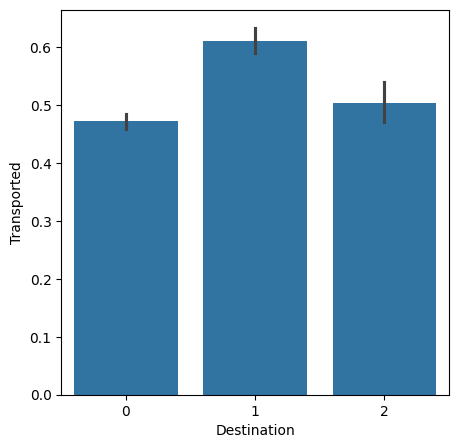

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="Destination", y="Transported", data=df)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   int64  
 2   CryoSleep     4277 non-null   int64  
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   int64  
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   int64  
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 434.5+ KB


Scaling

In [ ]:
scaler = StandardScaler()
df[['Age', 'ShoppingMall', 'FoodCourt', 'VRDeck', 'Spa', 'RoomService']] = scaler.fit_transform(df[['Age', 'ShoppingMall', 'FoodCourt', 'VRDeck', 'Spa', 'RoomService']])

#test data
scaler = StandardScaler()
df_test[['Age', 'ShoppingMall', 'FoodCourt', 'VRDeck', 'Spa', 'RoomService']] = scaler.fit_transform(df_test[['Age', 'ShoppingMall', 'FoodCourt', 'VRDeck', 'Spa', 'RoomService']])

In [ ]:
X = df.drop(columns = ["Name", "Cabin", "PassengerId", "Transported"])
Y = df["Transported"]

X_t = df_test.drop(columns = ["Name", "Cabin", "PassengerId"])
X_t

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,0,-1.182216e-01,0,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561
1,0,0,0,-6.886014e-01,0,-0.364780,-0.285385,-0.319859,2.283008,-0.251561
2,2,1,1,1.669682e-01,0,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561
3,2,0,0,6.660505e-01,0,-0.364780,4.118523,-0.319859,-0.110576,0.222074
4,0,0,0,-6.173039e-01,0,-0.348143,-0.291352,0.825745,-0.274558,-0.251561
...,...,...,...,...,...,...,...,...,...,...
4272,0,1,0,3.808606e-01,0,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561
4273,0,0,0,9.512404e-01,0,-0.364780,0.270158,-0.289189,-0.265498,-0.134974
4274,1,1,1,-2.532995e-16,0,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561
4275,2,0,0,-2.532995e-16,0,-0.364780,1.485327,-0.319859,-0.274558,0.171877


Spliting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)

(8693, 10) (6954, 10) (1739, 10)


Model training

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [ ]:
X_test_pred = model.predict(X_test)
training_acc = accuracy_score(Y_test, X_test_pred)
print("Accuary score: ", training_acc)

Accuary score:  0.7671075330649799


Predict test data

In [ ]:
X_test2_pred = model.predict(X_t)

In [ ]:
diction = dict(zip(df_test['PassengerId'],X_test2_pred))
result = pd.DataFrame({'PassengerID':df_test['PassengerId'],'Transported':X_test2_pred})
result
result['Transported'] = result['Transported'].replace({0:False,1:True})
result.to_csv('Spaceship Titanic.csv',index=False)